In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt

In [3]:
# Load files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Import OS Dependency
import os

In [5]:
# Read the CSV and store into a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
# Count the lines of data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# Check if there are any null values in the data
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# Count the lines of data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
# Check if there are any null values
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
# Check for the data types in each column per dataframe
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# How many cities are there
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [14]:
# How many data points reference Urban
sum(city_data_df["type"]=="Urban")

66

In [15]:
# How many data points reference Suburban
sum(city_data_df["type"] == "Suburban")

36

In [16]:
# How many data points reference Rural
sum(city_data_df["type"] == "Rural")

18

In [17]:
# Merge the dataframes
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create a dataframe for each type of city
urban_cities_df = pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"]== "Suburban"]

In [20]:
rural_cities_df = pyber_data_df[pyber_data_df["type"]== "Rural"]

In [21]:
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [22]:
# Get the number of rides for each type of city
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [23]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [24]:
# Average rides per city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [25]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [26]:
# Average driver count
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [27]:
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

In [28]:
# Create each scatter plot individually, then merge

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

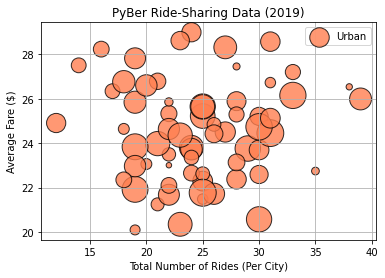

In [29]:
# Scatter plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10*urban_driver_count,
           edgecolor = "black", linewidths = 1,
           color = "coral",
           alpha = 0.8,
           label = 'Urban'
           )
plt.legend()
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

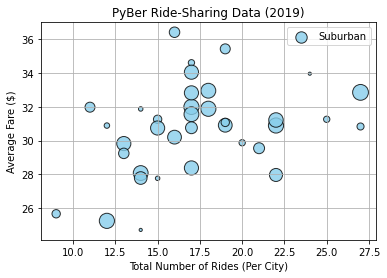

In [30]:
# Scatter plot for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s = 10*suburban_driver_count,
           edgecolor = "black", linewidths = 1,
           color = "skyblue",
           alpha = 0.8,
           label = 'Suburban'
           )
plt.legend()
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")

Text(0.5, 1.0, 'PyBer Ride-Sharing Data (2019)')

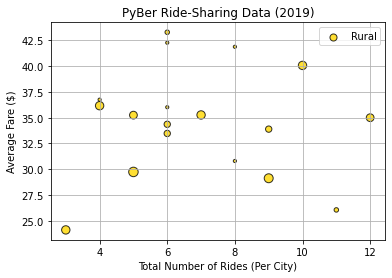

In [31]:
# Scatter plot for suburban cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s = 10*rural_driver_count,
           edgecolor = "black", linewidths = 1,
           color = "gold",
           alpha = 0.8,
           label = 'Rural'
           )
plt.legend()
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")

<function matplotlib.pyplot.show(close=None, block=None)>

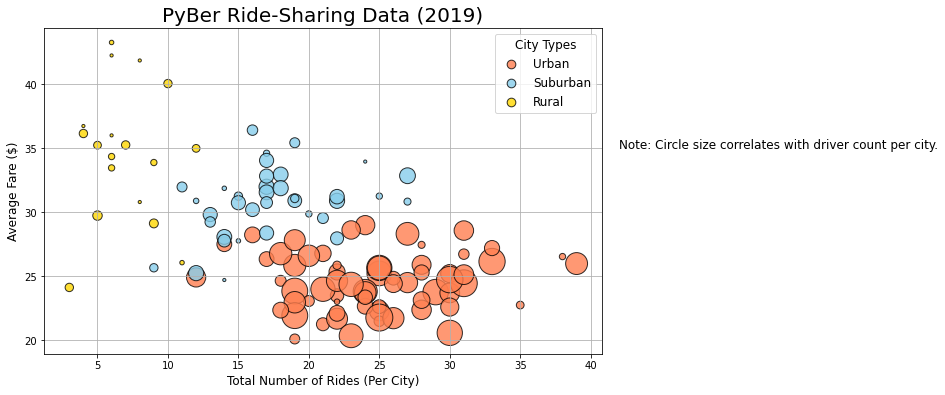

In [41]:
# Add the scatter charts for each type of city
plt.subplots(figsize = (10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s = 10*urban_driver_count,
           edgecolor = "black", linewidths = 1,
           color = "coral",
           alpha = 0.8,
           label = 'Urban'
           )

plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s = 10*suburban_driver_count,
           edgecolor = "black", linewidths = 1,
           color = "skyblue",
           alpha = 0.8,
           label = 'Suburban'
           )

plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s = 10*rural_driver_count,
           edgecolor = "black", linewidths = 1,
           color = "gold",
           alpha = 0.8,
           label = 'Rural'
           )

# Incorporate the other graph properties
plt.legend()
plt.grid(True)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize = 12)

#Save the figure
plt.savefig("analysis/Fig1.png")

plt.show

In [42]:
# Get the summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [43]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [44]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [45]:
# Get the summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [46]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [47]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [48]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [50]:
# Calculate the mean of the ride count for each city type.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [51]:
import scipy.stats as sts

In [57]:
# Calculate the measures of central tendence for the ride count for each type of city
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [58]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")
median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [59]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")
median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [60]:
# Get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [61]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [62]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
suburban_fares = suburban_cities_df["fare"]

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [63]:
# Calculate the measures of central tendency for the average fare for the rural cities.
rural_fares = rural_cities_df["fare"]

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [74]:
# Get ther driver count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")

The mean driver count for urban trips is 36.67815384615385.
The median driver count for urban trips is 37.0.
The mode driver count for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [75]:
# Get ther driver count data from the suburban cities
suburban_drivers = suburban_cities_df["driver_count"]

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {mean_suburban_drivers}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

The mean driver count for suburban trips is 13.712.
The median driver count for suburban trips is 16.0.
The mode driver count for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [76]:
# Get ther driver count data from the rural cities
rural_drivers = rural_cities_df["driver_count"]

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {mean_rural_drivers}.")

median_rural_drivers = np.median(urban_drivers)
print(f"The median driver count for rural trips is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for rural trips is 4.296.
The median driver count for rural trips is 37.0.
The mode driver count for rural trips is ModeResult(mode=array([1]), count=array([32])).


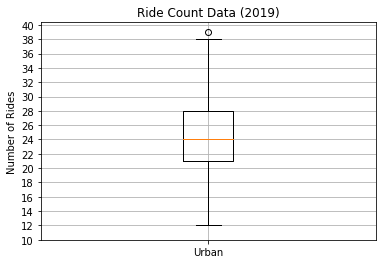

In [78]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# Add a title, y_axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show()

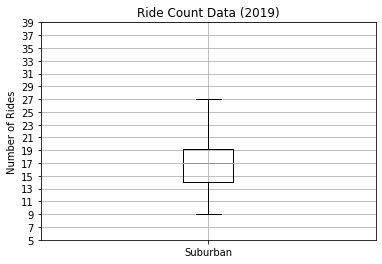

In [82]:
# Create a box-and-whisker plot for the suburban cities ride count
x_labels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels = x_labels)

# Add a title, y_axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(5, 41, step = 2.0))
ax.grid()
plt.show()

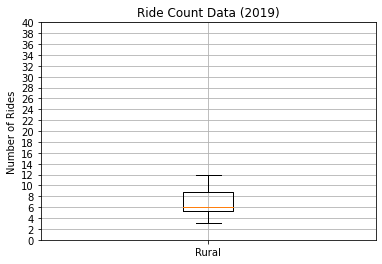

In [81]:
# Create a box-and-whisker plot for the rural cities ride count
x_labels = ["Rural"]
fig,ax = plt.subplots()
ax.boxplot(rural_ride_count, labels = x_labels)

# Add a title, y_axis label and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0, 41, step = 2.0))
ax.grid()
plt.show()

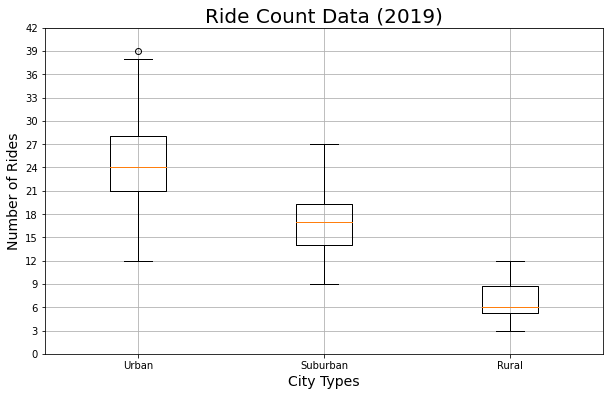

In [85]:
# Add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig,ax = plt.subplots(figsize = (10,6))
ax.set_title("Ride Count Data (2019)", fontsize = 20)
ax.set_ylabel("Number of Rides", fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0,45,step = 3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")
plt.show()

In [87]:
# Get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the higher rider count.")

West Angela has the higher rider count.


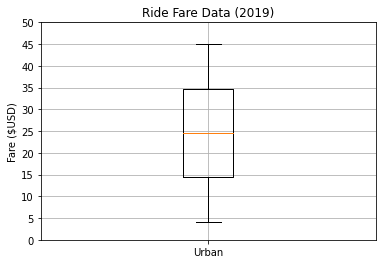

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [88]:
# Create a box-and-whisker plot for the urban fare data
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

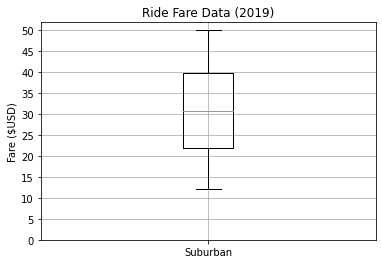

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [89]:
# Create a box-and-whisker plot for the suburban fare data
x_labels = ["Suburban"]
fig,ax = plt.subplots()
ax.boxplot(suburban_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

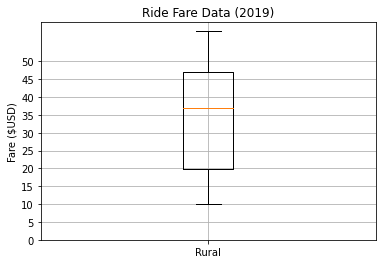

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [90]:
# Create a box-and-whisker plot for the rural fare data
x_labels = ["Rural"]
fig,ax = plt.subplots()
ax.boxplot(rural_fares, labels = x_labels)
ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step = 5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

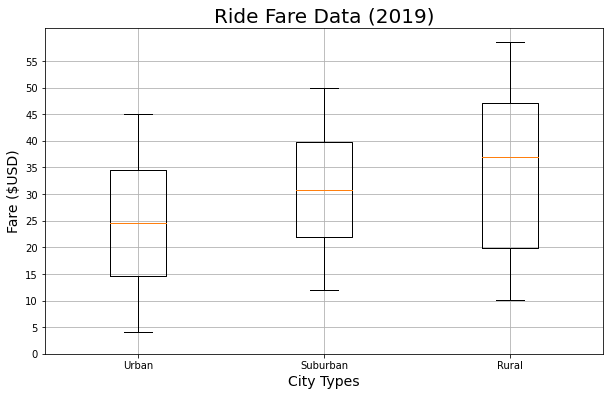

In [102]:
# Create a box-and-whisker plot for all cities' fare data
x_labels = ["Urban", "Suburban", "Rural"]
fig,ax = plt.subplots(figsize = (10,6))
ax.boxplot([urban_fares, suburban_fares, rural_fares],labels=x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_ylabel("Fare ($USD)", fontsize = 14)
ax.set_yticks(np.arange(0,60,step = 5.0))
ax.set_xlabel("City Types", fontsize = 14)
ax.grid()
plt.show()

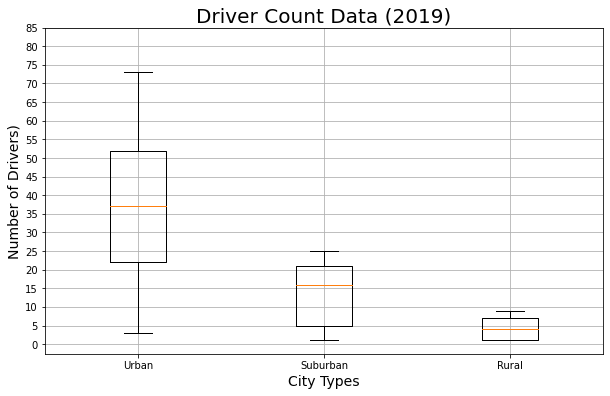

Summary Statistics


In [104]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot([urban_drivers, suburban_drivers, rural_drivers],labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers)', fontsize = 14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.set_xlabel("City Types", fontsize = 14)
ax.grid()
plt.show()
print("Summary Statistics")

In [105]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [106]:
# Get the sum of all fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [109]:
# Calculate the total % of fares for each city type
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

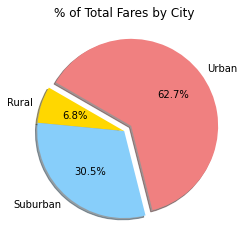

In [118]:
# Build the percentage of fares by city type pie chart
plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1],
       autopct = "%1.1f%%",
       shadow = True,
       startangle = 150)
plt.title("% of Total Fares by City")
plt.show()

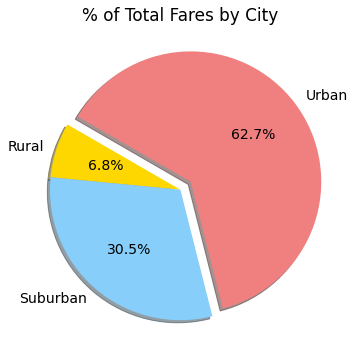

In [120]:
# Same chart, update the fontsize
import matplotlib as mpl
plt.subplots(figsize = (10,6))
plt.pie(type_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1],
       autopct = "%1.1f%%",
       shadow = True,
       startangle = 150)
plt.title("% of Total Fares by City")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 18

plt.savefig("analysis/Fig5.png")
plt.show()

In [122]:
# Get the sum of the rides for each city type
sum_rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [123]:
# Calculate the total % of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

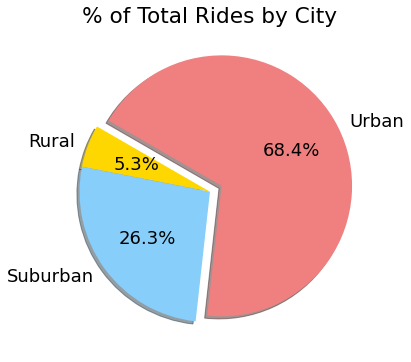

In [125]:
# Total % of rides for each city pie chart
import matplotlib as mpl
plt.subplots(figsize = (10,6))
plt.pie(ride_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1],
       autopct = "%1.1f%%",
       shadow = True,
       startangle = 150)
plt.title("% of Total Rides by City")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 18

plt.savefig("analysis/Fig6.png")
plt.show()

In [127]:
# Calculate the total % of drivers for each city type
driver_percents = 100 * pyber_data_df.groupby(["type"]).sum()["driver_count"]/pyber_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

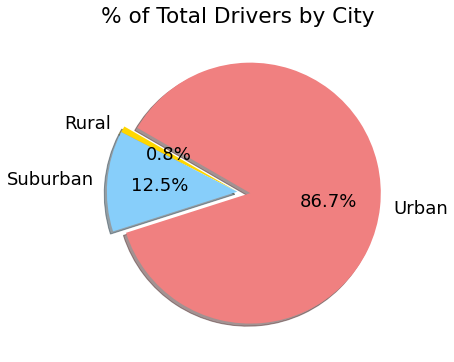

In [136]:
# Total % of drivers for each city pie chart
import matplotlib as mpl
plt.subplots(figsize = (10,6))
plt.pie(driver_percents, 
        labels = ["Rural", "Suburban", "Urban"],
        colors = ["gold", "lightskyblue", "lightcoral"],
       explode = [0, 0, 0.1],
       autopct = "%1.1f%%",
       shadow = True,
       startangle = 150)
plt.title("% of Total Drivers by City")

# Change the default font size from 10 to 14
mpl.rcParams['font.size'] = 18

plt.savefig("analysis/Fig7.png")
plt.show()